

**Population vs Sample**

* *Population*: all units of interest (e.g., all students in a university).
* *Sample*: subset taken from the population used to estimate population properties.

**Sampling goal:** obtain a sample that represents the population so estimates (mean, proportion, variance) have low bias and known uncertainty.

---

## Sampling methods

### Simple Random Sampling (SRS)

* Every unit in the population has equal probability of being chosen.
* Implementation: draw `n` indices uniformly without replacement.
* Pros: unbiased, easy to analyze.
* Cons: may be inefficient if population is heterogeneous and you need precision for subgroups.

### Stratified Sampling

* Partition population into **strata** (homogeneous groups) and sample within each stratum (often proportionally).
* Use when subgroups differ and you want precise estimates within subgroups.
* Pros: lowers variance of estimates if strata are well chosen.
* Cons: requires knowledge of strata and sampling frame.

### Systematic Sampling

* Choose a random start, then pick every `k`th unit $(k = N / n)$.
* Pros: simple to implement in the field, evenly spaced sample.
* Cons: may be biased if there's periodicity in ordering correlated with the variable.

---

## Sampling distributions & Central Limit Theorem (CLT)

**Sampling distribution:** distribution of a statistic (e.g., sample mean) over repeated samples of the same size from the population.

**Central Limit Theorem (CLT)** (informal): for large sample size `n`, the distribution of the sample mean $(\bar{X})$ of independent, identically distributed random variables with finite mean $(\mu)$ and variance $(\sigma^2)$ is approximately normal:
$[
\bar{X} \xrightarrow{d} \mathcal{N}\left(\mu,\ \frac{\sigma^2}{n}\right)
]$
Key consequences:

* Mean of sampling distribution = population mean $(\mu)$.
* Standard deviation of sampling distribution (standard error) = $(\sigma/\sqrt{n})$.
* CLT holds quickly for well-behaved distributions; for heavy-tailed distributions you need larger `n`.

**Practical uses:** compute confidence intervals, conduct hypothesis tests, estimate margins of error.

---

# 2️⃣ Hands-on exercises (with Python code)

Drop each code block into a Python notebook (Jupyter/Colab). These use only `numpy`, `pandas`, `matplotlib`, and `scipy` where relevant.

---

## Setup (imports used by exercises)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
np.random.seed(42)


### Exercise 1 — Simple Random Sampling (basic)

**Task:** Given a population array `pop`, draw a simple random sample of size `n` without replacement and compute sample mean.

In [2]:
# population
pop = np.arange(1, 1001)  # population values 1..1000
N = len(pop)
n = 50

# simple random sample without replacement
sample_idx = np.random.choice(N, size=n, replace=False)
sample = pop[sample_idx]
print("Sample mean:", sample.mean())
print("Population mean:", pop.mean())


Sample mean: 540.0
Population mean: 500.5


**What to check:** How close is sample mean to population mean? Repeat multiple draws.

---

### Exercise 2 — Sampling with replacement (bootstrap seed)

**Task:** Draw a sample *with replacement* and compare to without replacement.


In [3]:
# with replacement
sample_wr = np.random.choice(pop, size=n, replace=True)
print("Sample mean (with replacement):", sample_wr.mean())


Sample mean (with replacement): 572.86


**Reflection:** When N is large relative to n, sampling with vs without replacement gives similar results.

---

### Exercise 3 — Systematic sampling

**Task:** Implement systematic sampling: choose random start in `[0, k-1]` then take every `k`th element.

In [4]:
N = 1000
n = 40
k = N // n
start = np.random.randint(0, k)
sys_indices = np.arange(start, start + k*n, k)[:n]
systematic_sample = pop[sys_indices]
print("Systematic sample mean:", systematic_sample.mean())


Systematic sample mean: 492.5


**Note:** If the population has periodic structure aligned with `k`, bias can occur.

---

### Exercise 4 — Stratified sampling (proportional)

**Task:** Create a DataFrame with a categorical stratum and numeric value. Perform proportional stratified sampling.


In [5]:
# construct population with strata
np.random.seed(1)
N = 1000
strata = np.random.choice(['A','B','C'], size=N, p=[0.5, 0.3, 0.2])
values = (strata == 'A') * np.random.normal(50, 5, N) + \
         (strata == 'B') * np.random.normal(60, 7, N) + \
         (strata == 'C') * np.random.normal(70, 6, N)
df = pd.DataFrame({'stratum': strata, 'value': values})

# desired total sample size
n = 120
# proportional allocation
counts = df['stratum'].value_counts(normalize=True) * n
counts = counts.round().astype(int)

samples = []
for s, c in counts.items():
    sub = df[df['stratum'] == s]
    samples.append(sub.sample(n=c, replace=False))

strat_sample = pd.concat(samples)
print(strat_sample.groupby('stratum')['value'].mean())
print("Population means by stratum:\n", df.groupby('stratum')['value'].mean())


stratum
A    50.563557
B    59.890009
C    68.053550
Name: value, dtype: float64
Population means by stratum:
 stratum
A    50.195618
B    59.566569
C    70.363409
Name: value, dtype: float64


### Exercise 5 — CLT simulation: sample means from any distribution

**Task:** Simulate the sampling distribution of the sample mean for different sample sizes `n` and show CLT.

n=5: mean of means=1.988, std (empirical SE)=0.873


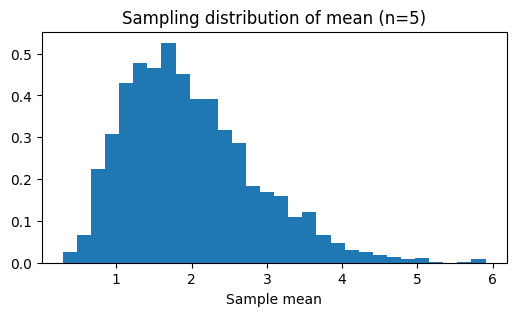

n=30: mean of means=1.988, std (empirical SE)=0.358


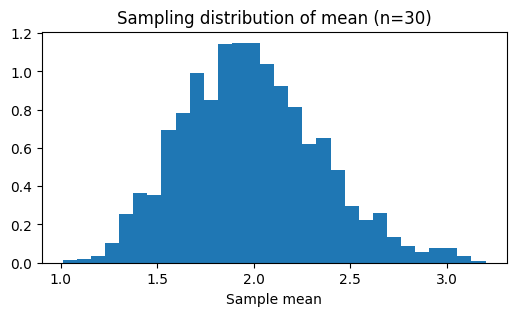

n=100: mean of means=2.001, std (empirical SE)=0.196


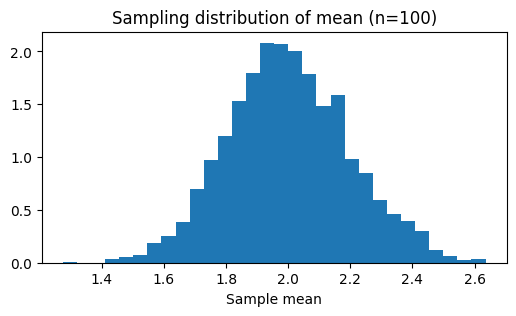

In [6]:
# population from an exponential distribution (skewed)
pop = np.random.exponential(scale=2.0, size=1000000)

def sampling_distribution(pop, n, reps=1000):
    means = [np.random.choice(pop, size=n, replace=False).mean() for _ in range(reps)]
    return np.array(means)

for n in [5, 30, 100]:
    means = sampling_distribution(pop, n, reps=2000)
    print(f"n={n}: mean of means={means.mean():.3f}, std (empirical SE)={means.std(ddof=1):.3f}")
    plt.figure(figsize=(6,3))
    plt.hist(means, bins=30, density=True)
    plt.title(f"Sampling distribution of mean (n={n})")
    plt.xlabel("Sample mean")
    plt.show()


**Observation:** As `n` increases, the sampling distribution of the mean becomes more normal and narrower; empirical SE ≈ population std / sqrt(n).

---

### Exercise 6 — Verify standard error formula

**Task:** Compare empirical standard deviation of sample means to theoretical $(\sigma/\sqrt(n))$.

In [8]:
pop_sigma = pop.std(ddof=0)
n = 50
means = sampling_distribution(pop, n, reps=5000)
empirical_se = means.std(ddof=1)
theoretical_se = pop_sigma / np.sqrt(n)
print("Empirical SE:", empirical_se)
print("Theoretical SE:", theoretical_se)


Empirical SE: 0.28322423456599927
Theoretical SE: 0.28261345333944526


### Exercise 7 — CLT with heavy-tailed data

**Task:** Use a heavy-tailed Pareto distribution and explore how large `n` must be for approximate normality.

n=10: skew=17.129, kurtosis=364.034


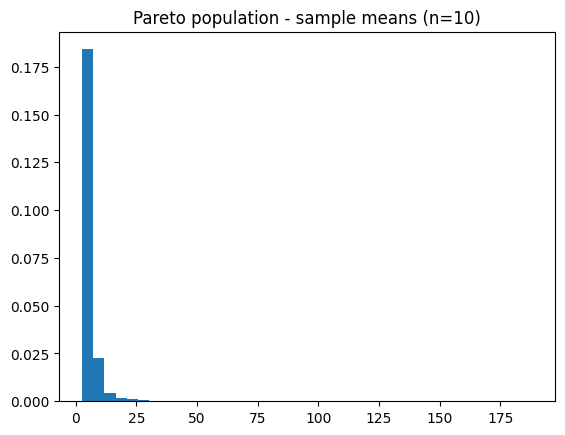

n=50: skew=15.572, kurtosis=298.393


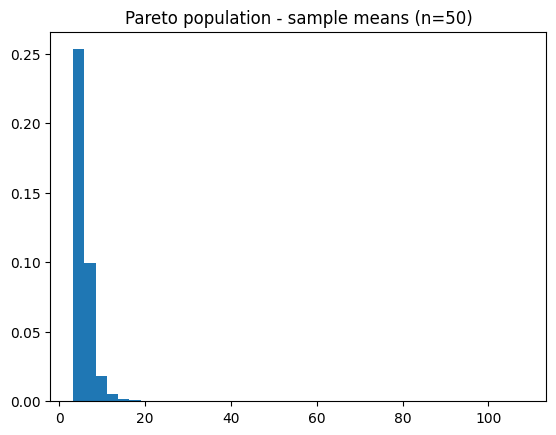

n=200: skew=4.880, kurtosis=48.923


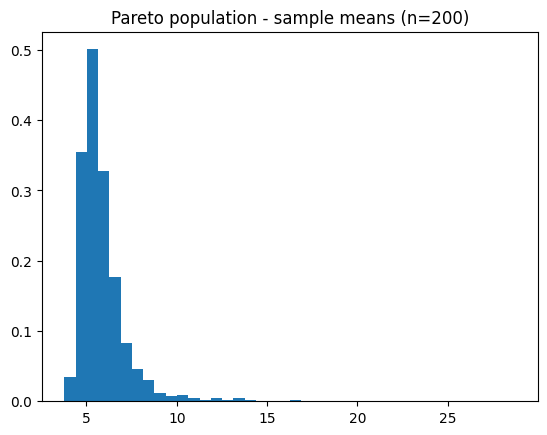

n=1000: skew=25.153, kurtosis=723.690


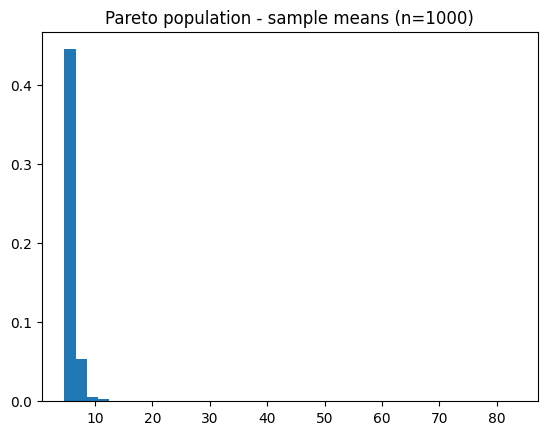

In [9]:
# heavy-tailed Pareto
pop_pareto = (np.random.pareto(a=1.5, size=500000) + 1) * 2
for n in [10, 50, 200, 1000]:
    means = sampling_distribution(pop_pareto, n, reps=2000)
    print(f"n={n}: skew={stats.skew(means):.3f}, kurtosis={stats.kurtosis(means):.3f}")
    plt.hist(means, bins=40, density=True)
    plt.title(f"Pareto population - sample means (n={n})")
    plt.show()


**Interpretation:** Heavy tails slow CLT convergence — larger `n` needed.

---

### Exercise 8 — Confidence interval for mean using CLT

**Task:** For a sample, compute 95% CI for population mean using sample mean ± z * (s/√n).


In [10]:
from scipy.stats import norm
sample = np.random.choice(pop, size=100, replace=False)
xbar = sample.mean()
s = sample.std(ddof=1)
n = len(sample)
z = norm.ppf(0.975)
ci_lower = xbar - z * s / np.sqrt(n)
ci_upper = xbar + z * s / np.sqrt(n)
print("95% CI:", (ci_lower, ci_upper))


95% CI: (np.float64(1.7657536612639821), np.float64(2.6661957874446))


**Note:** For small `n` or non-normal populations, use t-distribution.

---

### Exercise 9 — Bootstrap (resampling) to estimate sampling distribution

**Task:** Use bootstrap to estimate SE and CI for a statistic (median or mean).

In [11]:
data = np.random.exponential(scale=2.0, size=200)
B = 2000
boot_means = [np.random.choice(data, size=len(data), replace=True).mean() for _ in range(B)]
print("Bootstrap mean SE:", np.std(boot_means, ddof=1))
# Bootstrap percentile CI
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)
print("Bootstrap 95% CI:", (ci_lower, ci_upper))


Bootstrap mean SE: 0.17561896029512375
Bootstrap 95% CI: (np.float64(1.98100633406827), np.float64(2.6639333714696103))


### Exercise 10 — Compare sampling strategies empirically

**Task:** For the stratum population created earlier, compare variance of the estimator (sample mean) using (a) SRS of size `n`, (b) proportional stratified sample of size `n`, (c) systematic sample of size `n`. Repeat many times to estimate MSE/variance.

In [12]:
def evaluate_strategy(df, n, reps=1000):
    srs_means = []
    strat_means = []
    sys_means = []
    N = len(df)
    k = N // n
    for _ in range(reps):
        # SRS
        srs = df.sample(n=n)
        srs_means.append(srs['value'].mean())
        # Stratified proportional
        counts = (df['stratum'].value_counts(normalize=True) * n).round().astype(int)
        parts = []
        for s,c in counts.items():
            sub = df[df['stratum']==s]
            parts.append(sub.sample(n=c))
        strat = pd.concat(parts)
        strat_means.append(strat['value'].mean())
        # Systematic
        start = np.random.randint(0, k)
        sys_idx = np.arange(start, start + k*n, k)[:n]
        sys = df.iloc[sys_idx]
        sys_means.append(sys['value'].mean())
    return np.var(srs_means, ddof=1), np.var(strat_means, ddof=1), np.var(sys_means, ddof=1)

var_srs, var_strat, var_sys = evaluate_strategy(df, n=120, reps=200)
print("Var SRS:", var_srs, "Var Stratified:", var_strat, "Var Systematic:", var_sys)


Var SRS: 0.7279368676626976 Var Stratified: 0.2706233104472554 Var Systematic: 0.3448250289016081


**Expectation:** Stratified variance often lower when strata are informative.

---

### Exercise 11 — Design effect and effective sample size

**Task:** Given stratified vs SRS variances, compute design effect `deff = Var_complex / Var_srs` and effective sample size `n_eff = n / deff`.

In [13]:
deff = var_strat / var_srs
n = 120
n_eff = n / deff
print("Design effect:", deff)
print("Effective sample size:", n_eff)


Design effect: 0.3717675563214549
Effective sample size: 322.78233525100836


### Exercise 12 — Visual summary: CLT animation-style (many sample sizes)

**Task:** Plot histograms of sample means side-by-side for n in [5,10,30,100].


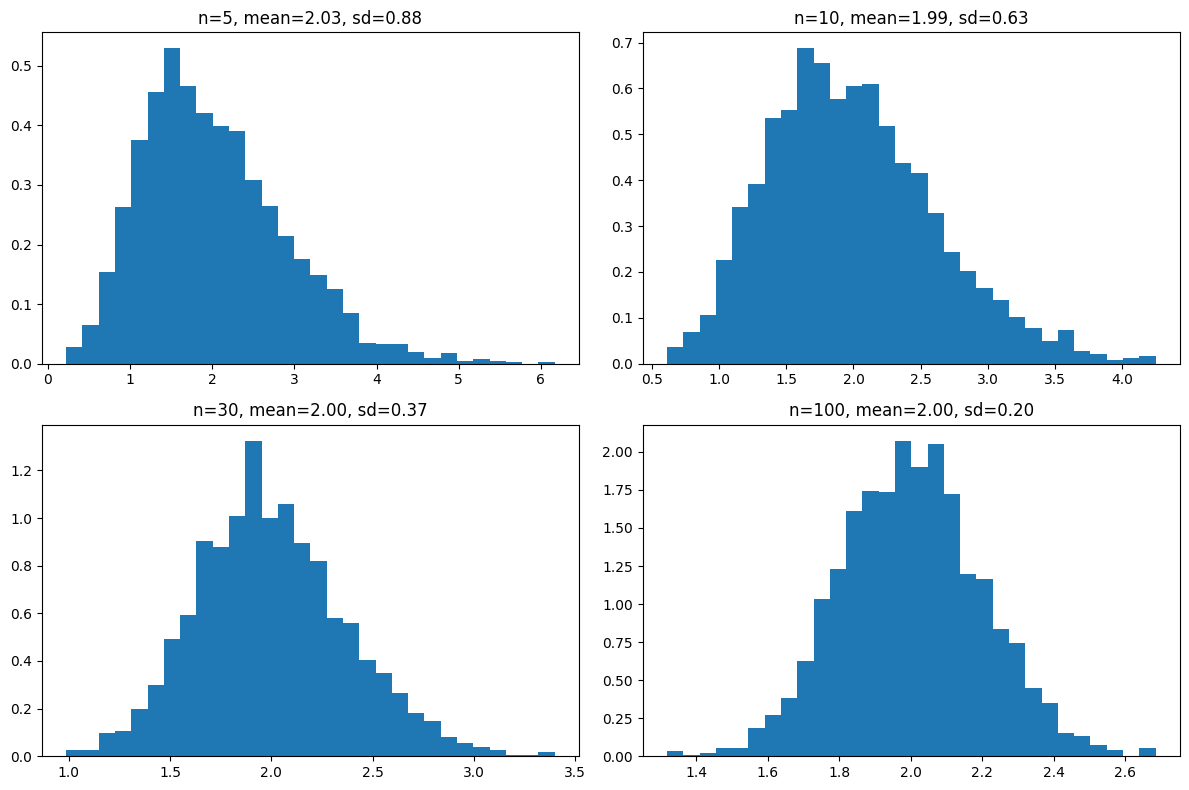

In [15]:
ns = [5, 10, 30, 100]
plt.figure(figsize=(12,8))
for i, n in enumerate(ns, 1):
    means = sampling_distribution(pop, n, reps=2000)
    plt.subplot(2,2,i)
    plt.hist(means, bins=30, density=True)
    plt.title(f"n={n}, mean={means.mean():.2f}, sd={means.std():.2f}")
plt.tight_layout()
plt.show()
